# Phase 1: 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
color = sns.color_palette()

In [2]:
train_df = pd.read_json("train.json")
train_df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [3]:
train_df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

## Visualization of target variable (interest level)

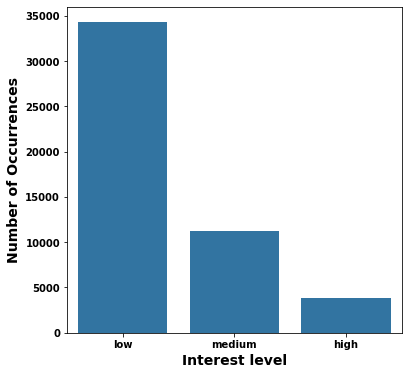

In [4]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(int_level.index, int_level.values, alpha=1, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xlabel('Interest level', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

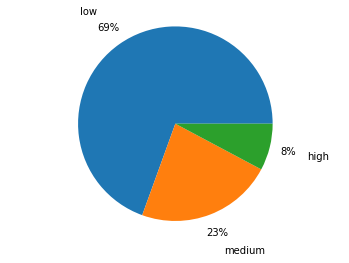

In [5]:
plt.pie(int_level.values,(0,0,0),int_level.index, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.show()

## Hour-wise listing trend

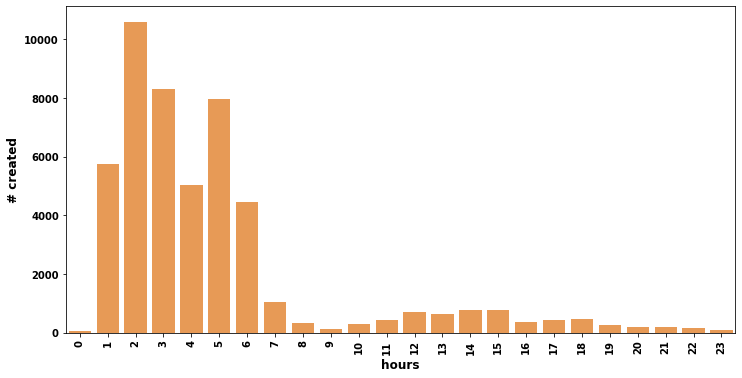

In [6]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["hour_created"] = train_df["created"].dt.hour
hour = train_df['hour_created'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(hour.index, hour.values, alpha=0.8, color=color[1])
plt.xlabel('hours', fontsize=12, fontweight='bold')
plt.ylabel('# created', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [7]:
top5 = hour[:5]
print("Busiest 5:\n",top5)

Busiest 5:
 2    10596
3     8318
5     7954
1     5749
4     5021
Name: hour_created, dtype: int64


## Visualizing features

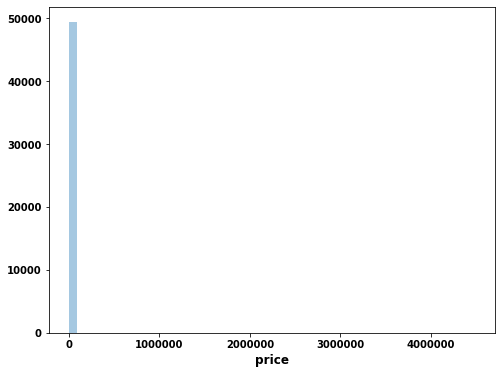

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=False)
plt.xlabel('price', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

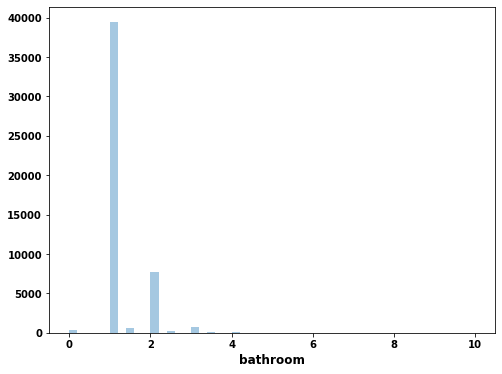

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.bathrooms.values, kde=False)
plt.xlabel('bathroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

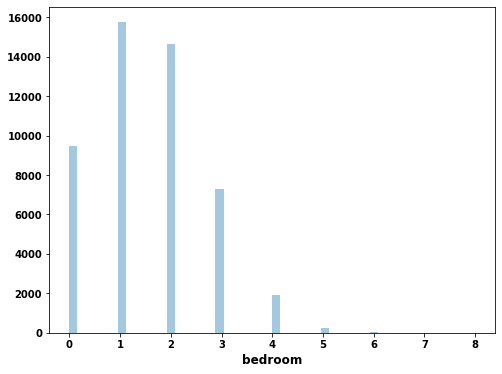

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.bedrooms.values, kde=False)
plt.xlabel('bedroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

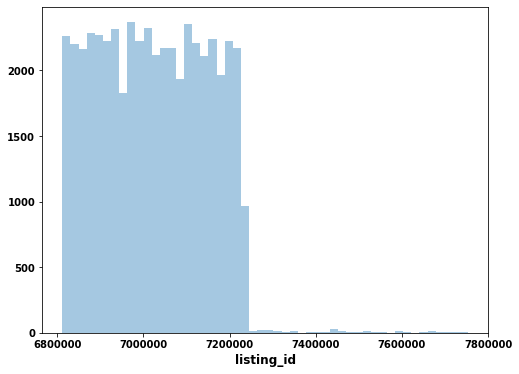

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.listing_id.values, bins=50, kde=False)
plt.xlabel('listing_id', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

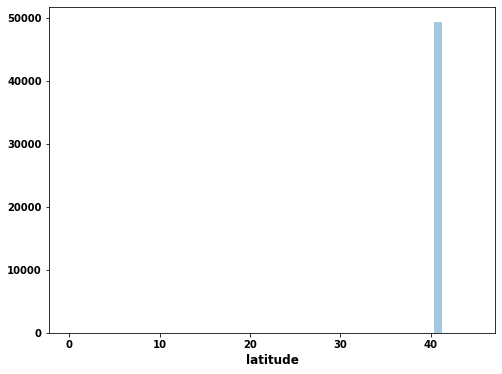

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

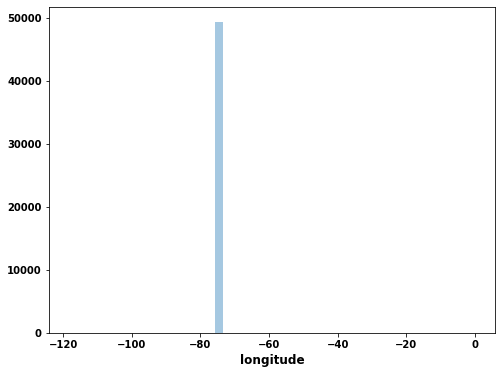

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


## Handling missing values

In [14]:
# check if there are any null/nan values
train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
hour_created       0
dtype: int64

### Bedrooms

In [15]:
# aggregate bedroom values by count
train_df.groupby('bedrooms').count()

,bathrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour_created
bedrooms,,,,,,,,,,,,,,,
0,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475
1,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752
2,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623
3,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276
4,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929
5,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
6,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [16]:
# sum count of all bedroom values
train_df.groupby('bedrooms').count().sum()

bathrooms          49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
interest_level     49352
hour_created       49352
dtype: int64

We found 9475 values with a bedroom count of 0. This is simply too high of a number to assume it is an error. Upon checking some photos, we realized that these are probably studio apartments so no bedrooms makes sense. When we aggregated the count of every value of bedrooms, we found there were no missing values.

### Bathrooms

In [17]:
# aggregate bathroom values by count
train_df.groupby('bathrooms').count()

,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour_created
bathrooms,,,,,,,,,,,,,,,
0.0,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313
1.0,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422
1.5,645,645,645,645,645,645,645,645,645,645,645,645,645,645,645
2.0,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660
2.5,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277
3.0,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745
3.5,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
4.0,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
4.5,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29


In [18]:
# sum the count of all bathroom values
train_df.groupby('bathrooms').count().sum()

bedrooms           49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
interest_level     49352
hour_created       49352
dtype: int64

Again, we found no missing values for bathrooms.

### Building ID

In [19]:
#building_id

whichrow = 0
count = 0
for row in train_df['building_id']:
    if row=='0' or any(c.isalpha() for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(30)

number of missing values:  8286


It's unlikely that building ID has any effect on the interest level of a listing so we left these values.

### Description

In [20]:
#description

whichrow = 0
count = 0
for row in train_df['description']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

number of missing values:  3336


### Features

In [21]:
#features

whichrow = 0
count = 0
for row in train_df['features']:
    if row==[]:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

number of missing values:  3218


In [22]:
#created

import datetime

whichrow = 0
count = 0
for row in train_df['created']:
    if isinstance(row, datetime.datetime) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  0


In [23]:
#display_address

whichrow = 0
count = 0
for row in train_df['display_address']:
    if any(c.isalpha() for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  141


In [24]:
#street_address

whichrow = 0
count = 0
for row in train_df['street_address']:
    if any(c.isalpha() for c in row) == False :
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  13


In [25]:
#latitude

whichrow = 0
count = 0
for row in train_df['latitude']:
    if row==0:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  12


In [26]:
#listing_id

whichrow = 0
count = 0
for row in train_df['listing_id']:
    if row==0 or row=='null':
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  0


In [27]:
#longitude

whichrow = 0
count = 0
for row in train_df['longitude']:
    if row==0:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  12


In [28]:
#manager_id

whichrow = 0
count = 0
for row in train_df['manager_id']:
    if  row==0 or row =='0' or any(c.isalpha() for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  0


In [29]:
#photos

whichrow = 0
count = 0
for row in train_df['photos']:
    if  any(isinstance(c,str) for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  3615


In [30]:
#price

whichrow = 0
count = 0
for row in train_df['price']:
    if row==0:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  0


In [31]:
#interest_level

whichrow = 0
count = 0
list= ["low", "medium", "high"]
for row in train_df['interest_level']:
    if row not in list :
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

number of missing values:  0


#### Impactful missing values will be replaced by the mean of their respective column in the next section

## Handling outliers

### Prices

In [33]:
# prices (inner fences=mild outliers)

q25, q75 = np.percentile(train_df['price'].values, 25), np.percentile(train_df['price'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['price'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))

number of mild outliers: 2788


### Before Handling

100.0
6500.0
43
4490000


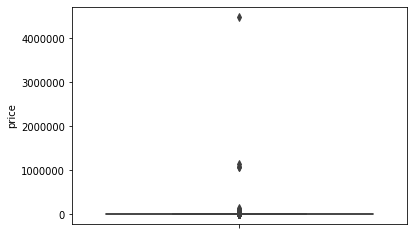

In [35]:
print(lower)
print(upper)
sns.boxplot(y=train_df['price'])
print(min(train_df['price']))
print(max(train_df['price']))

### After Handling

3271.047117945194
401.0
6500.0


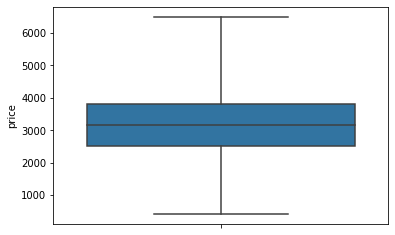

In [36]:
from scipy import nanmean
import math

whichrow = 0
for row in train_df['price']:
    if row>upper or row<lower:
        train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
        
mean_val =nanmean(train_df['price'])
print(mean_val)

whichrow = 0
for row in train_df['price']:
    if math.isnan(row):
        train_df.loc[train_df.index[whichrow],'price'] = mean_val
        whichrow+=1
    else:
        whichrow+=1

# after handling
sns.boxplot(y=train_df['price'], whis = [0,100])
print(min(train_df['price']))
print(max(train_df['price']))

### Latitude

In [37]:
q25, q75 = np.percentile(train_df['latitude'].values, 25), np.percentile(train_df['latitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['latitude'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))

### Before Handling

40.6593
40.8433
0.0
44.8835


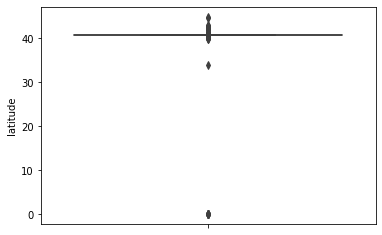

In [39]:
print(lower)
print(upper)
sns.boxplot(y=train_df['latitude'])
print(min(train_df['latitude']))
print(max(train_df['latitude']))

### After Handling

40.75069010965837
40.6594
40.8433


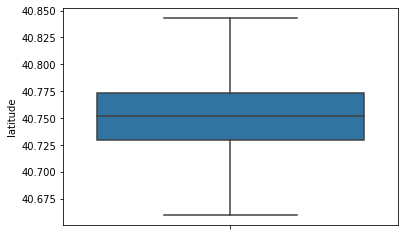

In [40]:
whichrow = 0
for row in train_df['latitude']:
    if row>upper or row<lower:
        train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
        
mean_val = nanmean(train_df['latitude'])
print(mean_val)
whichrow = 0
for row in train_df['latitude']:
    if row == None:
        train_df.loc[train_df.index[whichrow],'latitude'] = mean_val
        whichrow+=1
    else:
        whichrow+=1

# after handling
sns.boxplot(y=train_df['latitude'], whis = [0,100])
print(min(train_df['latitude']))
print(max(train_df['latitude']))

### Longitude

In [41]:
q25, q75 = np.percentile(train_df['longitude'].values, 25), np.percentile(train_df['longitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['longitude'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))

### Before Handling

-73.89945000000003
-74.04704999999998
-118.271
0.0


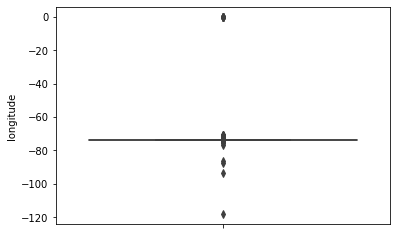

In [43]:
print(upper)
print(lower)
sns.boxplot(y=train_df['longitude'])
print(min(train_df['longitude']))
print(max(train_df['longitude']))

### After Handling

-73.97500617409327
-74.0454
-73.8995


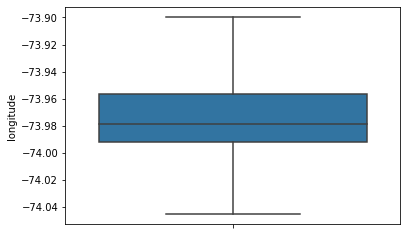

In [44]:
whichrow = 0
for row in train_df['longitude']:
    if row>upper or row<lower:
        train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
        
mean_val = nanmean(train_df['longitude'])
print(mean_val)
whichrow = 0
for row in train_df['longitude']:
    if row == None:
        train_df.loc[train_df.index[whichrow],'longitude'] = mean_val
        whichrow+=1
    else:
        whichrow+=1

# after handling
sns.boxplot(y=train_df['longitude'] , whis = [0,100])
print(min(train_df['longitude']))
print(max(train_df['longitude']))

### Bedrooms

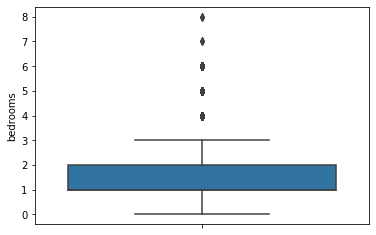

In [45]:
sns.boxplot(y=train_df['bedrooms'])

### Bathroom

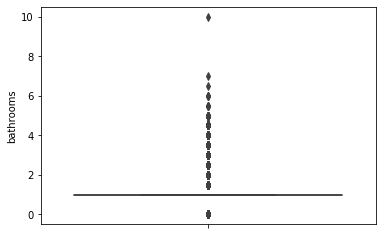

In [46]:
sns.boxplot(y=train_df['bathrooms'])

### Bathroom and Bedrooms

Outlier detection for bathrooms and bedrooms isn't meaningful because all values fall within a tidy distribution. All bathroom values lie between 0-4 and all bedroom values lie between 0-3, which makes sense for studio apartments and shared bathrooms.

### Created

Since no missing values were found, it doesn't seem meaningful to detect outliers since the only outlier values would be missing values or dates that don't exist (not one of 365 days in a year).

### Building ID, Manager ID, Listing ID

Again, not meaningful for outliers because there is no real meaning to these values, other than to identify the listing.

### Photos, Description, Features, Addresses

No discernable way to identify outliers until we are able to extract these features. Outliers would probably be photos of objects other than the listing, and text that doesn't relate, or an address outside of New York.

## Text feature extraction

### Count Number of Words

In [47]:
import string
from string import punctuation

def counting(s):
    num=0
    words = s.translate(str.maketrans('', '', string.punctuation)).split()
    if len(words) == 0:
        return 0
    for w in words:
        if w !='br' and all(c.isalpha() for c in w):
            num+=1
    return num

train_df['d_word_count'] = train_df['description'].apply(lambda x: counting(x))
train_df['d_word_count'].head(10)

4      54
6     122
9     105
10     86
15     32
16    122
18     64
19     59
23     51
32    179
Name: d_word_count, dtype: int64

### Count Number of Characters in Description

In [48]:
train_df['d_char_count'] = train_df['description'].str.len()
train_df['d_char_count'].head(10)

4      553
6      827
9      799
10     588
15     344
16     907
18     489
19     439
23     379
32    1374
Name: d_char_count, dtype: int64

### Find Average Word Length

In [49]:


def avg_word(s):
    words = s.translate(str.maketrans('', '', string.punctuation)).split()
    if len(words) == 0:
        return 0
    iterate = (len(w) for w in words if w !='br' and all(c.isalpha() for c in w))
    return(sum(np.fromiter(iterate,int))/len(words))


train_df['d_avg_wlen'] = train_df['description'].apply(lambda x: avg_word(x) )
train_df['d_avg_wlen'].head(10)

4     4.662162
6     5.039062
9     5.086207
10    4.673913
15    6.153846
16    5.515625
18    5.449275
19    5.800000
23    5.846154
32    5.215385
Name: d_avg_wlen, dtype: float64

### Count Number of Stop Words

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

train_df['d_stopwords']= train_df['description'].apply(lambda x: len([x for x in x.translate(str.maketrans('', '', string.punctuation)).split() if x in stop]))
train_df['d_stopwords'].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4      8
6     41
9     29
10     8
15     0
16    27
18     0
19    11
23     9
32    34
Name: d_stopwords, dtype: int64

### Count Numeric Value in Description

In [51]:
train_df['d_num']= train_df['description'].apply(lambda x: len([x for x in x.translate(str.maketrans('', '', string.punctuation)).split() if x.isnumeric() == True]))
train_df['d_num'].head(10)

4     2
6     3
9     3
10    2
15    2
16    3
18    1
19    0
23    0
32    5
Name: d_num, dtype: int64

### Count Number of Special Characters

In [52]:
def num_punc(s):
    num = 0
    words = s.split()
    for w in words:
        for c in w:
            if c in punctuation:
                num+=1
    return num

train_df['d_punc']= train_df['description'].apply(lambda x: num_punc(x))
train_df['d_punc'].head(10)

4     81
6     42
9     57
10    43
15    40
16    51
18    34
19    28
23    20
32    89
Name: d_punc, dtype: int64

### Count Words That Contain At Least One Upper Letter

In [53]:
train_df['d_contain_upper']= train_df['description'].apply(lambda x: len([x for x in x.translate(str.maketrans('', '', string.punctuation)).split() if any(c.isupper() for c in x)]))
train_df['d_contain_upper'].head(10)

4     41
6     34
9     26
10    56
15    25
16    26
18    61
19    19
23    12
32    85
Name: d_contain_upper, dtype: int64

### Count Words With All Uppercase

In [54]:
train_df['d_all_upper']= train_df['description'].apply(lambda x: len([x for x in x.translate(str.maketrans('', '', string.punctuation)).split() if x.isupper()]))
train_df['d_all_upper'].head(10)

4      4
6      7
9      6
10     5
15     2
16     1
18    60
19     0
23     5
32     3
Name: d_all_upper, dtype: int64

### Encode unicode to strings

In [58]:
train_df['description'] = train_df['description'].apply(lambda x: x.encode('utf-8').strip())

In [59]:
# vectorize each description into a new column by frequency
# common stop words are excluded like a, the, in, etc.
# matches tokens of length 2+

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', token_pattern=r'^[a-zA-Z][a-zA-Z]+')
vectorizer.fit(train_df['description'].values);
train_df['desc_vect'] = train_df['description'].apply(lambda x: vectorizer.transform([x]))
# print(vectorizer.vocabulary_)  #shows all tokens

### Top 100 less meaningful words in description

In [60]:
top100_less_meaningful = sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get, reverse=True)[:100]
print('top100 less meaningful: ',top100_less_meaningful)

top100 less meaningful:  ['young', 'yes', 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', 'xxxxxxxxxxxxthe', 'xxxl', 'xxl', 'xx', 'xtra', 'xlarge', 'xl', 'wwwwwwwwwwwwwwwwwww', 'www', 'wrap', 'wpn', 'wow', 'wouldn', 'world', 'working', 'words', 'wood', 'wont', 'wondrous', 'wonderfully', 'wonderful', 'won', 'wolf', 'woff', 'winter', 'winning', 'wing', 'windows', 'windowed', 'williamsburgs', 'williamsburg', 'wide', 'wic', 'whoa', 'whitewashed', 'white', 'whirlpool', 'west', 'welcome', 'wedding', 'website', 'wdejjkljqalqw', 'way', 'waterfront', 'water', 'watch', 'washington', 'washer', 'wash', 'warm', 'wanting', 'want', 'walls', 'wall', 'walking', 'walk', 'wake', 'waived', 'wait', 'voluminous', 'voice', 'vivid', 'visit', 'views', 'view', 'video', 'vibrant', 'vented', 'vddcddvvx', 'vast', 'various', 'value', 'vacant', 'uws', 'utterly', 'utilities', 'uptown', 'upstairs', 'upscale', 'uppert', 'upper', 'upgraded', 'upeer', 'updated', 'unreal', 'unparalle

In [61]:
# vectorize each description into a new column by count
# matches words of lenght 2+

vectorizer = CountVectorizer(token_pattern=r'^[a-zA-Z][a-zA-Z]+', stop_words='english')
vectorizer.fit(train_df['description'].values);
train_df['desc_vect'] = train_df['description'].apply(lambda x: vectorizer.transform([x]))


### Top 100 common words in descriptions

In [62]:
description_top100_common = sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get, reverse=True)[:100]
print('top100 common words in description: ',description_top100_common)

top100 common words in description:  ['young', 'yes', 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', 'xxxxxxxxxxxxthe', 'xxxl', 'xxl', 'xx', 'xtra', 'xlarge', 'xl', 'wwwwwwwwwwwwwwwwwww', 'www', 'wrap', 'wpn', 'wow', 'wouldn', 'world', 'working', 'words', 'wood', 'wont', 'wondrous', 'wonderfully', 'wonderful', 'won', 'wolf', 'woff', 'winter', 'winning', 'wing', 'windows', 'windowed', 'williamsburgs', 'williamsburg', 'wide', 'wic', 'whoa', 'whitewashed', 'white', 'whirlpool', 'west', 'welcome', 'wedding', 'website', 'wdejjkljqalqw', 'way', 'waterfront', 'water', 'watch', 'washington', 'washer', 'wash', 'warm', 'wanting', 'want', 'walls', 'wall', 'walking', 'walk', 'wake', 'waived', 'wait', 'voluminous', 'voice', 'vivid', 'visit', 'views', 'view', 'video', 'vibrant', 'vented', 'vddcddvvx', 'vast', 'various', 'value', 'vacant', 'uws', 'utterly', 'utilities', 'uptown', 'upstairs', 'upscale', 'uppert', 'upper', 'upgraded', 'upeer', 'updated', 'unreal'

In [63]:
# convert features list to string
train_df['features'] = train_df['features'].apply(lambda x: ' '.join(x))

In [64]:
# vectorize features in new column by count

vectorizer.fit(train_df['features'].values);
train_df['feat_vect'] = train_df['features'].apply(lambda x: vectorizer.transform([x]))
#print(vectorizer.vocabulary_) #shows all tokens

### Top 100 common words in features

In [65]:
features_top100_common = sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get, reverse=True)[:100]
print('top100 common words in features : ', features_top100_common)

top100 common words in features :  ['yard', 'wood', 'wonderful', 'wifi', 'washer', 'walk', 'views', 'view', 'triplex', 'townhouse', 'terrace', 'swimming', 'storage', 'stainless', 'short', 'roof', 'residents', 'renovated', 'reduced', 'recreational', 'queen', 'private', 'prewar', 'pre', 'postwar', 'pool', 'pets', 'patio', 'parking', 'outdoor', 'offering', 'nyu', 'newly', 'new', 'multi', 'low', 'loft', 'live', 'laundry', 'high', 'hardwood', 'half', 'gym', 'gut', 'great', 'gramercy', 'garden', 'garage', 'furnished', 'french', 'fitness', 'fireplace', 'exposed', 'exclusive', 'elevator', 'eat', 'dw', 'duplex', 'doorman', 'dogs', 'dishwasher', 'dining', 'decorative', 'deco', 'deck', 'courtyard', 'common', 'close', 'childrens', 'cats', 'cable', 'building', 'brand', 'bike', 'balcony', 'available', 'assigned', 'air', 'actual', 'absolute']


## Image feature extraction

### Get Image

In [66]:
import glob
import imageio

im2_list = []
shape_list = []
config = glob.glob("C:/Users/kylez/images_sample/**/*.jpg", recursive = True)
for filename in config:
    im2 = imageio.imread(str(filename))
    im2_list.append(im2)
    shape_list.append(im2.shape)
print(im2_list[0])

[[[202 202 202]
  [202 202 202]
  [202 202 202]
  ...
  [161 163 162]
  [162 164 163]
  [162 164 163]]

 [[202 202 202]
  [202 202 202]
  [202 202 202]
  ...
  [161 163 162]
  [162 164 163]
  [162 164 163]]

 [[203 203 203]
  [203 203 203]
  [203 203 203]
  ...
  [161 163 162]
  [161 163 162]
  [161 163 162]]

 ...

 [[204 204 204]
  [204 204 204]
  [203 203 203]
  ...
  [ 69  62  43]
  [ 69  62  44]
  [ 69  62  44]]

 [[204 204 204]
  [204 204 204]
  [203 203 203]
  ...
  [ 66  57  40]
  [ 66  57  40]
  [ 66  57  40]]

 [[203 203 203]
  [203 203 203]
  [202 202 202]
  ...
  [ 64  55  40]
  [ 64  55  38]
  [ 64  55  40]]]


### Show Image

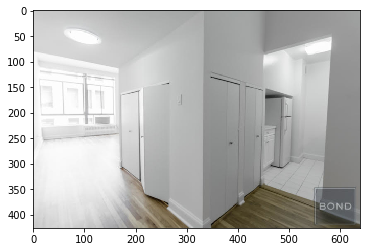

In [67]:
implot = plt.imshow(im2_list[0])
implot
plt.show()
print(shape_list[0])
print(im2_list[0].shape)

### Get Image Patches

In [69]:
from sklearn.feature_extraction import image

l = len(im2_list)
patches_list = []
for i in range (0,l):
    patches = image.extract_patches_2d(im2_list[i], (2,2) )
    patches_list.append(patches)
print('Patches shape: {}'.format(patches_list[0].shape))
print(patches_list[0][0])
# print(patches_list[0])

Patches shape: (271575, 2, 2, 3)
[[[202 202 202]
  [202 202 202]]

 [[202 202 202]
  [202 202 202]]]


### Reconstruct Image From Patches and Construct Tables

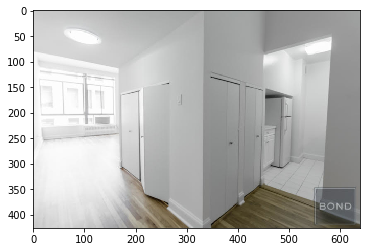

,images,patches
0,img1,"[[[[202 202 202], [202 202 202]], [[202 202 20..."
1,img2,"[[[[191 192 194], [191 192 194]], [[191 192 19..."
2,img3,"[[[[184 190 190], [184 190 190]], [[184 190 19..."
3,img4,"[[[[175 173 174], [174 172 173]], [[174 172 17..."
4,img5,"[[[[217 217 217], [217 217 217]], [[217 217 21..."
5,img6,"[[[[190 189 185], [191 190 186]], [[190 189 18..."
6,img7,"[[[[ 95 137 187], [ 96 136 187]], [[ 96 138 18..."
7,img8,"[[[[255 255 255], [255 255 255]], [[255 255 25..."
8,img9,"[[[[161 155 143], [161 155 143]], [[162 156 14..."
9,img10,"[[[[226 224 211], [224 225 211]], [[224 225 21..."


In [70]:
length = len(im2_list)

temp = []
for i in range (1,length):
    temp += ["img"+str(i)]
    
tempdict = dict.fromkeys(temp, [])

for i in range(1,length+1):
    tempdict["img"+str(i)] = patches_list[int(i)-1]


# reconstruct from patches and show image 
tempf = im2_list[0]
tempimg =image.reconstruct_from_patches_2d(patches_list[0],(426, 640, 3))
np.testing.assert_array_equal(tempf,tempimg)

implot = plt.imshow(tempimg.astype(int))
plt.show()


# build table
a = zip(temp,patches_list)
img_pat = pd.DataFrame(a, columns = ['images','patches'])
img_pat.head(10)

### Extracting Colour Histogram

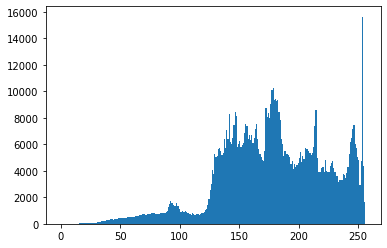

In [71]:
test_img = im2_list[0]
plt.hist(test_img.ravel(),256,[0,256]);
plt.show()

In [72]:

colorhist = []
for i in im2_list:
    colorhist.append(i.ravel())
# print(colorhist)

b = zip(temp,colorhist)
img_ravel = pd.DataFrame(b, columns = ['images','.ravel()'])
img_ravel.head(10)

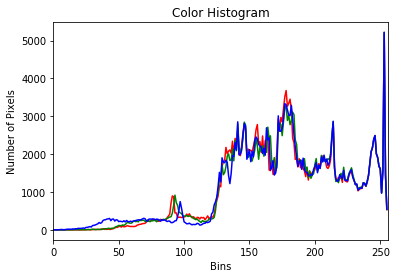

In [74]:
import cv2
  
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([test_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title("Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Number of Pixels")
plt.show()

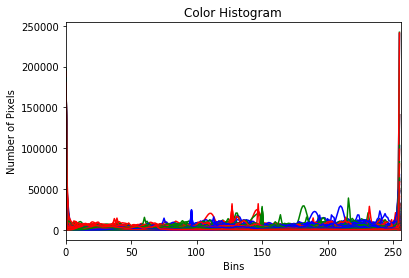

In [75]:
for image in im2_list:
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.title("Color Histogram")
        plt.xlabel("Bins")
        plt.ylabel("Number of Pixels")
plt.show()
# print(histr)

### Shi-Tomasi Corner Detector & Good Features to Track

In [76]:

top25_corners = []

for image in im2_list:
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
    corners = np.int0(corners)
    top25_corners.append(corners)
    # print(corners)
    
# print(top25_corners)

c = zip(temp,top25_corners)


# table matching images to their corners
img_25corners = pd.DataFrame(c, columns = ['images','25 corners'])
img_25corners.head(10)

,images,25 corners
0,img1,"[[[266, 143]], [[171, 309]], [[348, 130]], [[2..."
1,img2,"[[[184, 236]], [[185, 124]], [[195, 236]], [[1..."
2,img3,"[[[354, 347]], [[365, 357]], [[265, 350]], [[3..."
3,img4,"[[[342, 202]], [[263, 202]], [[330, 244]], [[5..."
4,img5,"[[[136, 264]], [[154, 214]], [[145, 241]], [[1..."
5,img6,"[[[519, 265]], [[235, 354]], [[478, 73]], [[35..."
6,img7,"[[[519, 299]], [[225, 323]], [[525, 259]], [[4..."
7,img8,"[[[10, 495]], [[11, 432]], [[10, 300]], [[234,..."
8,img9,"[[[298, 153]], [[300, 278]], [[229, 150]], [[3..."
9,img10,"[[[160, 75]], [[278, 119]], [[174, 95]], [[411..."


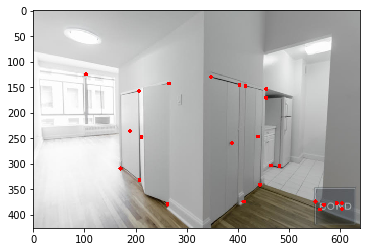

In [77]:
import copy

demo = copy.deepcopy(im2_list[0])
gray = cv2.cvtColor(demo,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(demo,(x,y),4,255,-1)

plt.imshow(demo)
plt.show()